In [79]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import boxcox
from plotnine import ggplot, aes, geom_qq, geom_qq_line, ggtitle, theme_minimal
from scipy.stats import yeojohnson
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import ADASYN
from sklearn.pipeline import make_pipeline
#to turn off unneccessory warnings
import warnings
warnings.simplefilter(action='ignore')

#Now we read our dataset
data = pd.read_csv('healthcare-dataset-stroke-data.csv')


In [80]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [81]:
# check for nulls
data.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [82]:
# Check for data info
data.info()
# Statistical summary of numerical columns
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Categorical Data:
   gender ever_married      work_type Residence_type   smoking_status
0    Male          Yes        Private          Urban  formerly smoked
1  Female          Yes  Self-employed          Rural     never smoked
2    Male          Yes        Private          Rural     never smoked
3  Female          Yes        Private          Urban           smokes
4  Female          Yes  Self-employed          Rural     never smoked

Numerical Data:
    age  hypertension  heart_disease  avg_glucose_level   bmi
0  67.0             0              1             228.69  36.6
1  61.0             0              0             202.21   NaN
2  80.0             0              1             105.92  32.5
3  49.0             0              0             171.23  34.4
4  79.0             1              0             174.12  24.0


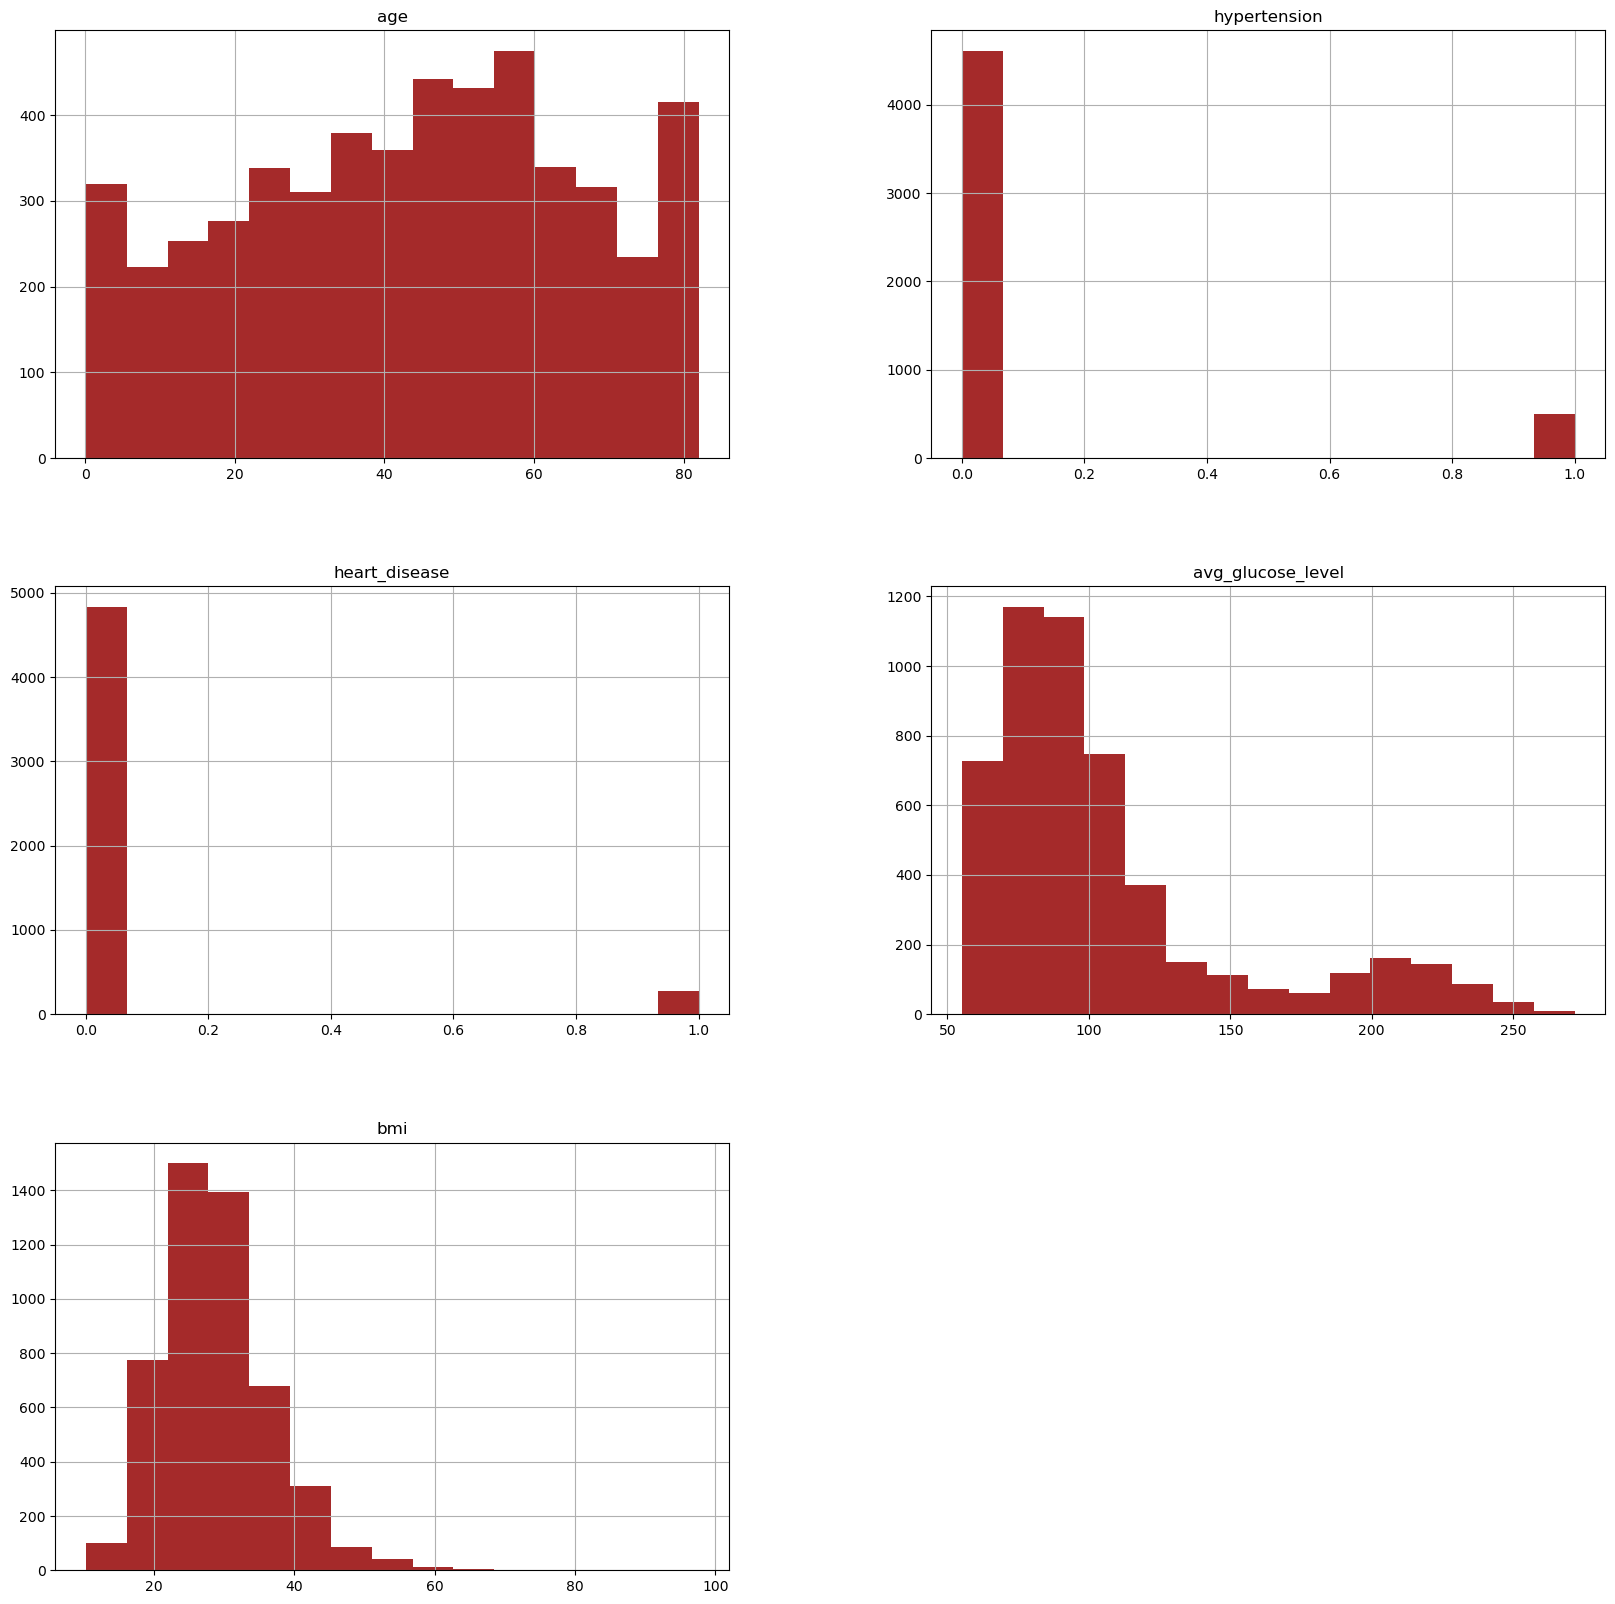

In [83]:
#Now we separate categorical data and numerical data to display the histograms of all diseases.
#Now we separate categorical data
cate = data.select_dtypes(include=['object'])

#Now we separate numerical data and remove 'id' and 'stroke' columns to get filtered data for diseases. 
nume = data.select_dtypes(exclude=['object']).drop(columns=['id', 'stroke'], errors='ignore')

# Display the first few rows of each
print("Categorical Data:")
print(cate.head())

print("\nNumerical Data:")
print(nume.head())

#Now displaying histograms of all diseases
nume.hist(bins=15, figsize=(20, 20), layout=(3, 2), color='brown')
plt.show()

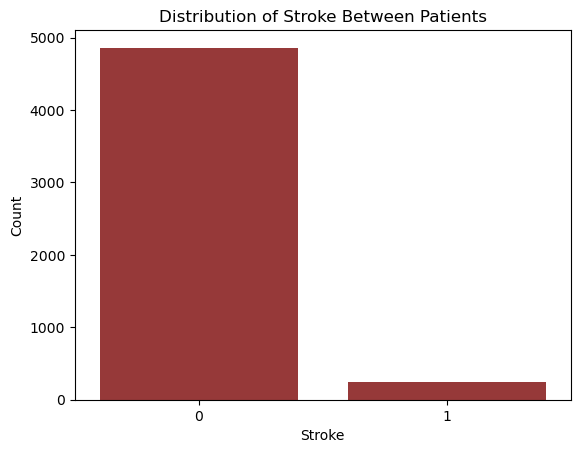

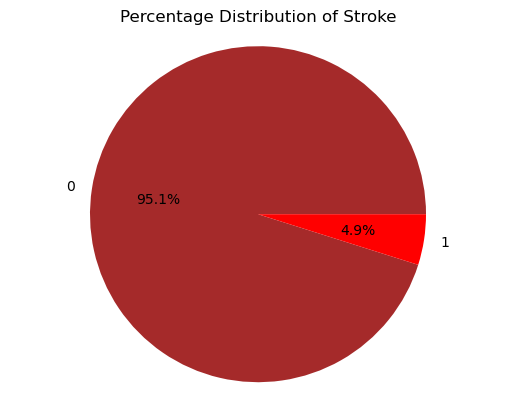

In [84]:
#Now we display the stroke distribution among all the patients
sns.countplot(x='stroke', data=data, color='brown')
plt.title('Distribution of Stroke Between Patients')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

#Now we will Calculate percentage distribution between the patients with the chances of stroke.
stroke_distribution = data['stroke'].value_counts(normalize=True) * 100

#Now we will Plot the result of percentage distribution

colors = ['brown', 'red']
plt.pie(stroke_distribution, labels=stroke_distribution.index, autopct='%1.1f%%', colors=colors)
plt.axis('equal')  
plt.title('Percentage Distribution of Stroke')
plt.show()

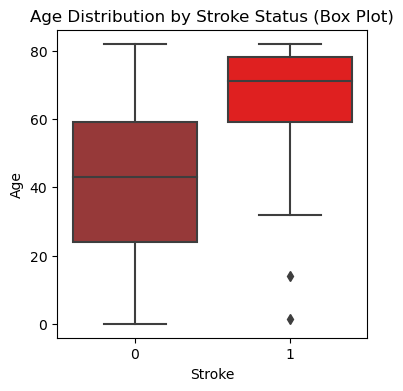

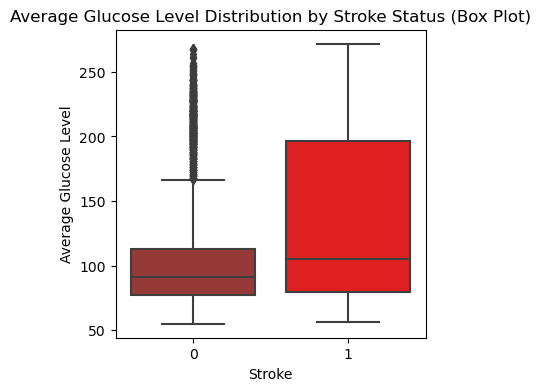

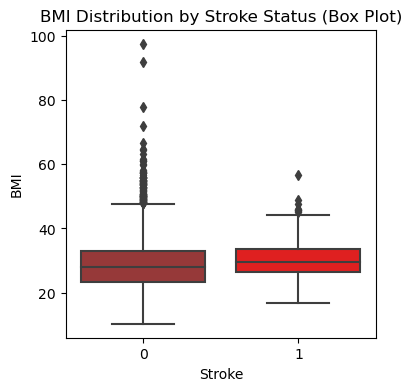

In [85]:
#Now we will display box plot of age, glucose level and BMI.
# Custom colors for box plots
colors = ['brown', 'red']

# Box plot for 'age'
plt.figure(figsize=(4, 4))
sns.boxplot(x='stroke', y='age', data=data, palette=colors)
plt.title('Age Distribution by Stroke Status (Box Plot)')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

# Box plot for 'avg_glucose_level'
plt.figure(figsize=(4, 4))
sns.boxplot(x='stroke', y='avg_glucose_level', data=data, palette=colors)
plt.title('Average Glucose Level Distribution by Stroke Status (Box Plot)')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.show()

# Box plot for 'bmi'
plt.figure(figsize=(4, 4))
sns.boxplot(x='stroke', y='bmi', data=data, palette=colors)
plt.title('BMI Distribution by Stroke Status (Box Plot)')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

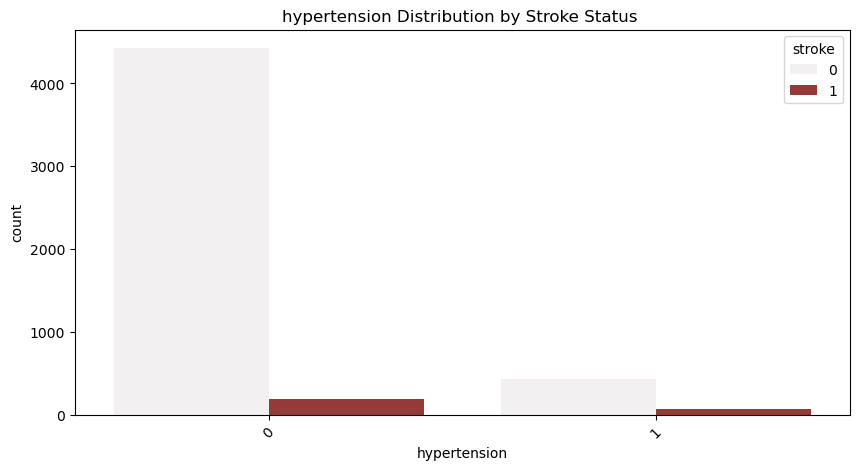

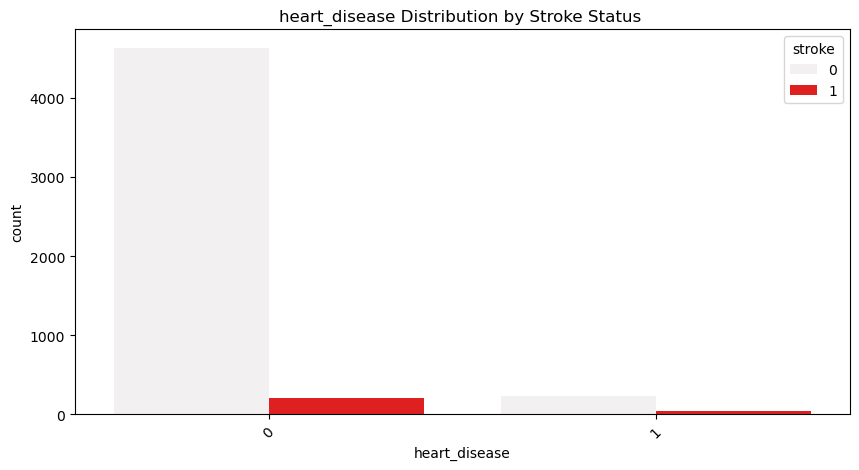

In [86]:
cols = ['hypertension', 'heart_disease']  

# Define a list of colors for each plot
colors = ['brown', 'red']

for i, column in enumerate(cols):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=data, hue='stroke', color= colors[i])    
    plt.title(f'{column} Distribution by Stroke Status ')
    plt.xticks(rotation=45)
    plt.show()

In [87]:
# check for missing values

data.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [88]:

#Now we will check for the missing values in "BMI"
miss_bmi = data['bmi'].isnull().astype(int)  

# Check correlation with other numeric variables only
num_data = data.select_dtypes(include=[np.number])
co_relation = num_data.corrwith(miss_bmi)

# Print correlations
print(co_relation)



id                  -0.127634
age                  0.078956
hypertension         0.093046
heart_disease        0.098621
avg_glucose_level    0.091957
bmi                       NaN
stroke               0.141238
dtype: float64


In [89]:
#Now we will use predictive models for imputing missing "BMI" values in a data table
# Select predictors
pred = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'stroke']

# Split the data into training and prediction sets
# Training data contains non-null BMI values
train_data = data.dropna(subset=['bmi'])
# Prediction data contains rows with null BMI values
pred_data = data[data['bmi'].isnull()]

# Extract features and target for training
X_train = train_data[pred]  # Features for training
y_train = train_data['bmi']        # Target variable for training

# Extract features for prediction
X_pred = pred_data[pred]  # Features for prediction

# Train a linear regression model to predict missing BMI values
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing BMI values using the trained model
pred_bmi = model.predict(X_pred)

# Impute the predicted BMI values back to the dataset
data.loc[data['bmi'].isnull(), 'bmi'] = pred_bmi

# Evaluate the model performance on the training data (optional)
# Predict BMI values for the training data
y_pred = model.predict(X_train)
# Calculate Mean Squared Error
mse = mean_squared_error(y_train, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 53.580665361532304


In [90]:
#Now we will again check for the NaNs
data.isnull().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [91]:
#Now we will check for the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


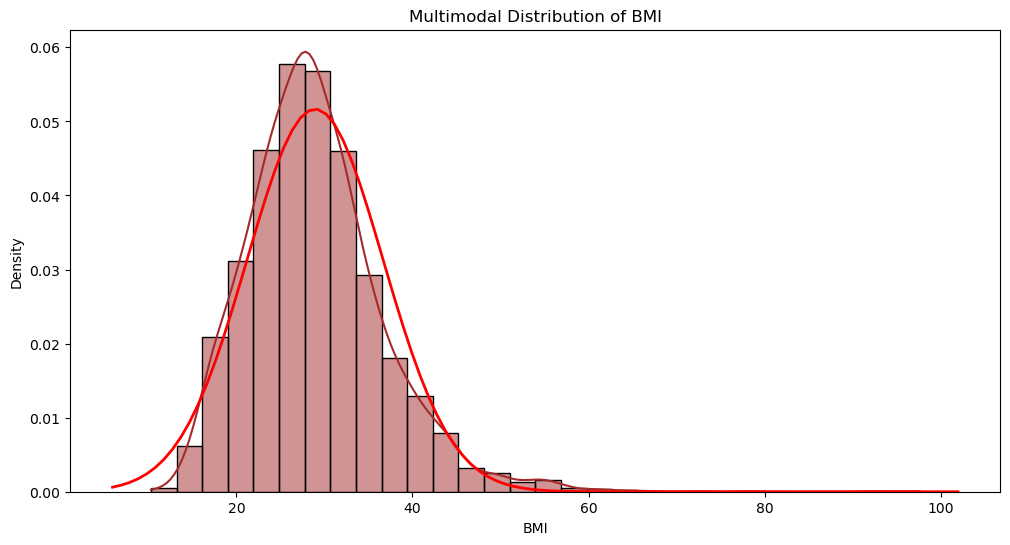

In [92]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot a histogram with kernel density estimate (KDE)
sns.histplot(data['bmi'], kde=True, color="brown", stat="density", bins=30)

# Fit a normal distribution to the data and plot it
mu, std = norm.fit(data['bmi'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)    
plt.plot(x, p, linewidth=2, color="red")

plt.title('Multimodal Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Density')

# Show the plot
plt.show()

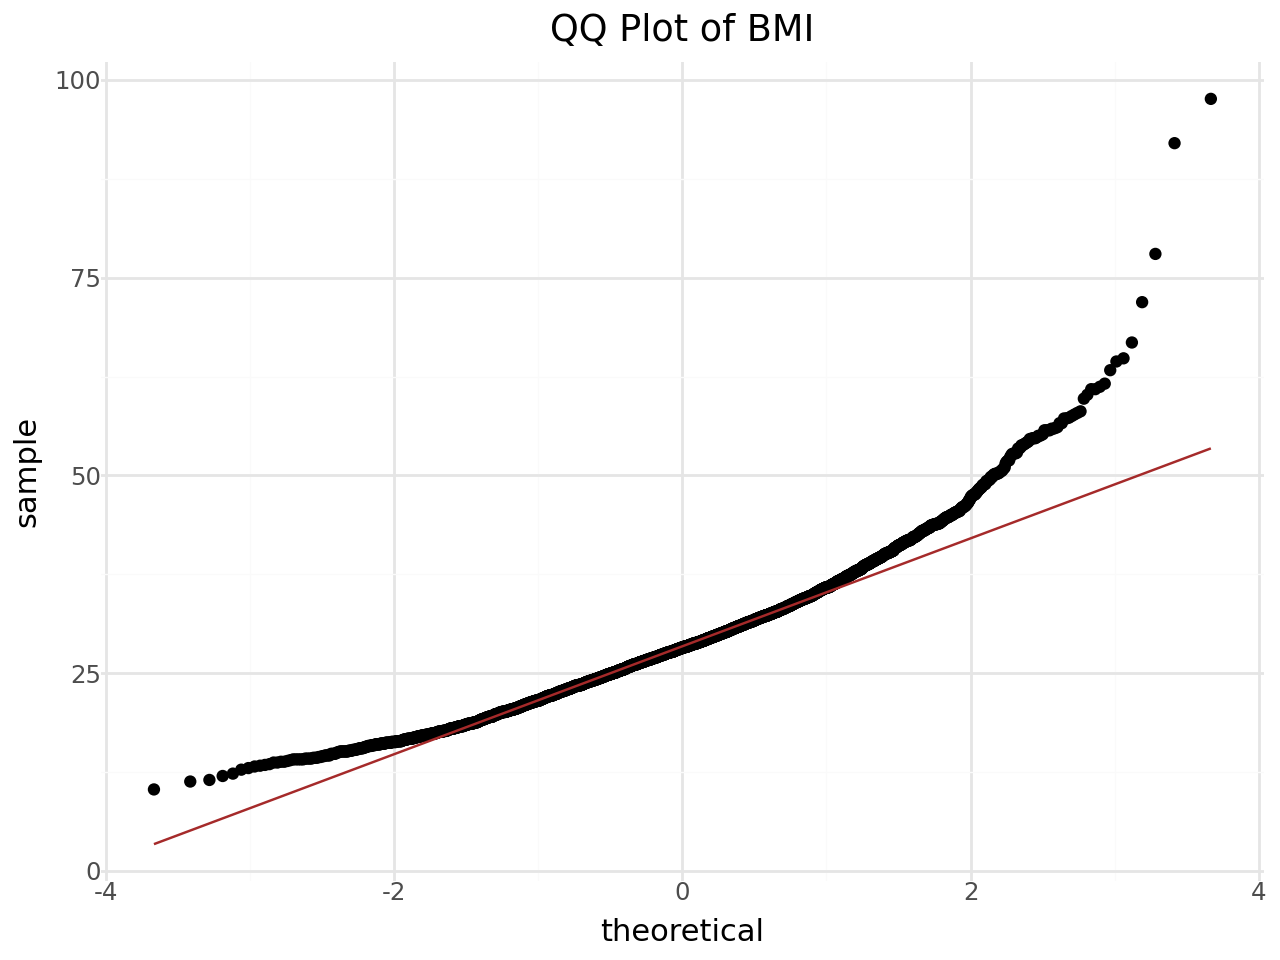

In [93]:
# Create a Q-Q plot for the 'bmi' column
qq_plot_bmi = (ggplot(data, aes(sample=data['bmi']))
               + geom_qq()
               + geom_qq_line(color="brown")  # Change color to blue
               + ggtitle('QQ Plot of BMI')
               + theme_minimal())

print(qq_plot_bmi)


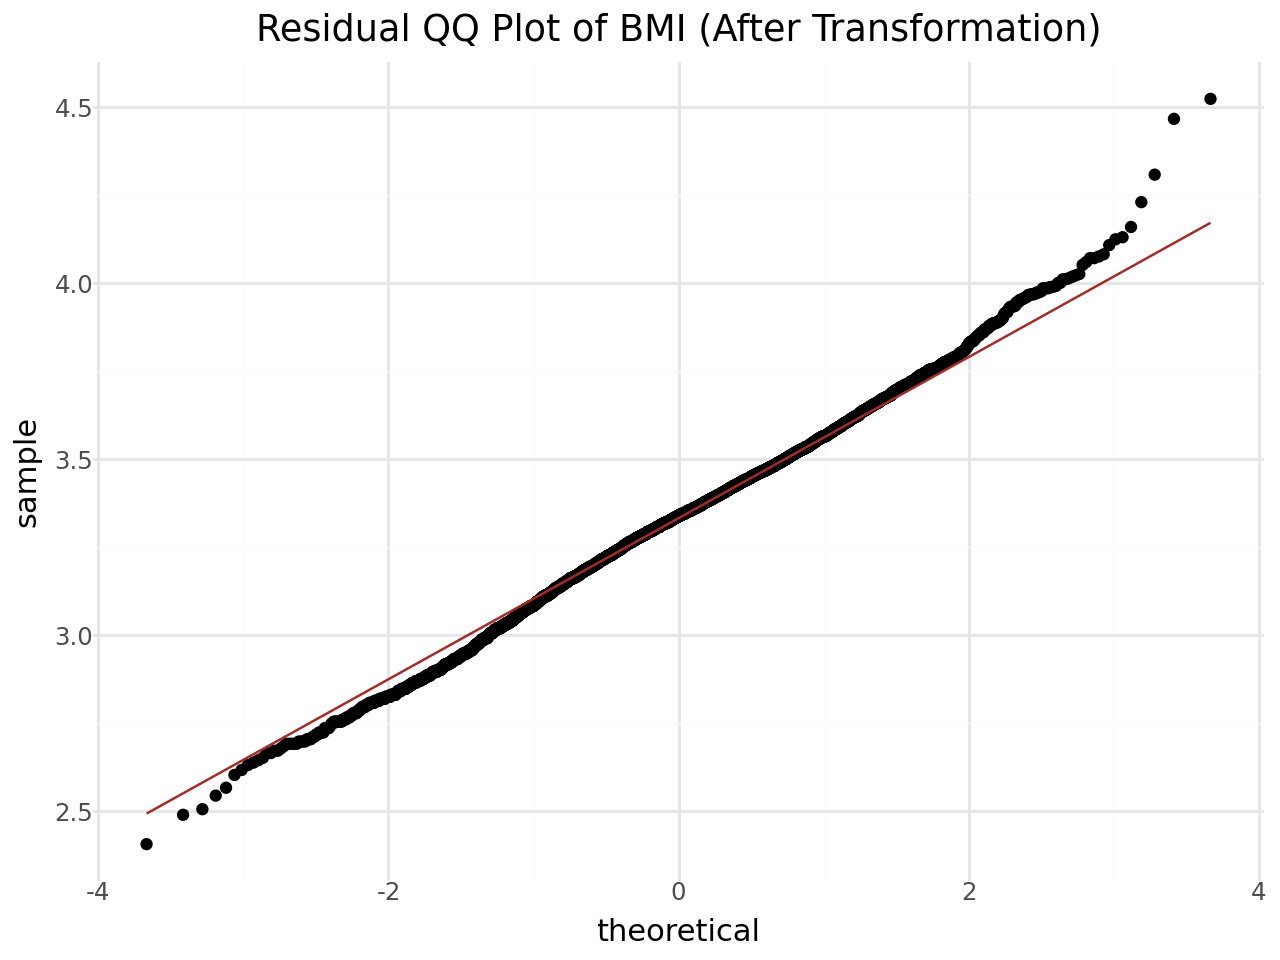

In [94]:
# Apply a Box-Cox transformation to the numerical variables and generate Q-Q plots
trans_data = pd.DataFrame()

# Apply Box-Cox transformation to the BMI column
trans_data['bmi'], _ = yeojohnson(data['bmi'])

# Generate QQ plots for the transformed BMI using plotnine
qq_plot_bmi = (ggplot(trans_data, aes(sample='bmi'))
               + geom_qq()
               + geom_qq_line(color="brown")  # Change the color here
               + ggtitle('Residual QQ Plot of BMI (After Transformation)')
               + theme_minimal())

print(qq_plot_bmi)

In [95]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# One-hot encode categorical columns
df_encoded = pd.get_dummies(data,categorical_cols)

#Now we will apply different AI models and for that

# Define features (X) and labels (y)
X = df_encoded.drop('stroke', axis=1)  
y = df_encoded['stroke']               

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Model Identifier
#A linear model used for binary classification is called logistic regression. It forecasts the likelihood that a specific input is a member of a given class. The ease of use and interpretability of logistic regression is one of its main benefits. Because it yields findings that are clearly comprehensible, it is especially helpful in situations where interpretability is critical, like in financial or medical applications where it is imperative to comprehend the components impacting the conclusion. In comparison to more intricate models, logistic regression is less prone to overfitting and performs well with limited datasets. Nevertheless, in situations when the relationship is non-linear, logistic regression may perform less well since it relies on a linear relationship between the features and the log-odds of the result.

model_name = 'Logistic Regression'

# Assuming X_train contains missing values
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.fit_transform(X_test)

# Split data into training and testing sets
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_train_imputed, y_train, test_size=0.2, random_state=42)

# Initialize and fit Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced')
logistic_model.fit(X_train_final, y_train_final)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [97]:
#Now we will check Train Data Accracy
# Define the model name
model_name = 'Logistic Regression'

# Make predictions on the training data using the logistic model
logistic_train_predictions = logistic_model.predict(X_train_imputed)

# Calculate the accuracy score of the model's predictions on the training data
accuracy_log_train = accuracy_score(logistic_train_predictions, y_train)

# Calculate the confusion matrix for the model's predictions on the training data
conf_matrix_logistic = confusion_matrix(y_train, logistic_train_predictions)

# Display the confusion matrix
print(f"Confusion Matrix for {model_name} on Training Data:")
print(conf_matrix_logistic)
print("\n")

# Print the accuracy of the model on the training data
print(f"Accuracy of {model_name} on Training Data: {accuracy_log_train * 100:.2f}%\n")

# Generate and print a classification report for the model's performance on the training data
class_report_logistic = classification_report(y_train, logistic_train_predictions, zero_division=0)
print(f"Classification Report for {model_name} on Training Data:")
print(class_report_logistic)

Confusion Matrix for Logistic Regression on Training Data:
[[2877 1024]
 [  36  151]]


Accuracy of Logistic Regression on Training Data: 74.07%

Classification Report for Logistic Regression on Training Data:
              precision    recall  f1-score   support

           0       0.99      0.74      0.84      3901
           1       0.13      0.81      0.22       187

    accuracy                           0.74      4088
   macro avg       0.56      0.77      0.53      4088
weighted avg       0.95      0.74      0.82      4088



In [98]:
#Now we will check Test Data Accracy
# Define the model name
model_name = 'Logistic Regression'

# Make predictions on the testing data using the logistic model
logistic_test_predictions = logistic_model.predict(X_test_imputed)

# Calculate the accuracy score of the model's predictions on the testing data
accuracy_log_test = accuracy_score(logistic_test_predictions, y_test)

# Calculate the confusion matrix for the model's predictions on the testing data
conf_matrix_logistic = confusion_matrix(y_test, logistic_test_predictions)

# Display the confusion matrix
print(f"Confusion Matrix for {model_name} on Testing Data:")
print(conf_matrix_logistic)
print("\n")

# Print the accuracy of the model on the testing data
print(f"Accuracy of {model_name} on Testing Data: {accuracy_log_test * 100:.2f}%\n")

# Generate and print a classification report for the model's performance on the testing data
class_report_logistic = classification_report(y_test, logistic_test_predictions, zero_division=0)
print(f"Classification Report for {model_name} on Testing Data:")
print(class_report_logistic)

Confusion Matrix for Logistic Regression on Testing Data:
[[714 246]
 [ 15  47]]


Accuracy of Logistic Regression on Testing Data: 74.46%

Classification Report for Logistic Regression on Testing Data:
              precision    recall  f1-score   support

           0       0.98      0.74      0.85       960
           1       0.16      0.76      0.26        62

    accuracy                           0.74      1022
   macro avg       0.57      0.75      0.56      1022
weighted avg       0.93      0.74      0.81      1022



In [99]:
#Now we will build the predictive system for above model
def predict_stroke(input):
    """
    Predicts whether a person is likely to have a stroke based on input features.

    Args:
    - input_features (dict): A dictionary containing input features for prediction.

    Returns:
    - str: A string indicating whether a stroke is detected or not.
    """

    # Convert input features to DataFrame
    input_df = pd.DataFrame([input])

    # One-hot encode the input data
    input_encoded = pd.get_dummies(input_df)

    # Ensure the input data has the same column structure as the training data
    for col in X_train.columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0  # Add missing columns as 0

    # Reorder the columns to match the training data
    input_encoded = input_encoded[X_train.columns]

    # Make prediction
    prediction = logistic_model.predict(input_encoded)

    # Return the prediction result
    return "Stroke Detected" if prediction[0] == 1 else "No Stroke"

# Example input features for prediction
input = {
    "gender": "Female",
    "age": 77,
    "hypertension": 0,
    "heart_disease": 0,
    "ever_married": "Yes",
    "work_type": "Self-employed",
    "Residence_type": "Urban",
    "avg_glucose_level": 178.95,
    "bmi": 42.8,
    "smoking_status": "formerly smoked"
}

# Predict
pred_result = predict_stroke(input)
print(f"Prediction Result: {pred_result}")

Prediction Result: Stroke Detected


In [100]:
def predict_stroke(input):
    """
    Predicts whether a person is likely to have a stroke based on input features.

    Args:
    - input_features (dict): A dictionary containing input features for prediction.

    Returns:
    - str: A string indicating whether a stroke is detected or not.
    """

    # Convert input features to DataFrame
    input_df = pd.DataFrame([input])

    # One-hot encode the input data
    input_encoded = pd.get_dummies(input_df)

    # Ensure the input data has the same column structure as the training data
    for col in X_train.columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0  # Add missing columns as 0

    # Reorder the columns to match the training data
    input_encoded = input_encoded[X_train.columns]

    # Make prediction
    prediction = logistic_model.predict(input_encoded)

    # Return the prediction result
    return "Stroke Detected" if prediction[0] == 1 else "No Stroke"

# Example input features for prediction
input = {
    "gender": "Female",
    "age": 20,
    "hypertension": 0,
    "heart_disease": 0,
    "ever_married": "No",
    "work_type": "Private",
    "Residence_type": "Urban",
    "avg_glucose_level": 79.61,
    "bmi": 18.2,
    "smoking_status": "smokes"
}

# Predict
pred_result = predict_stroke(input)
print(f"Prediction Result: {pred_result}")

Prediction Result: No Stroke


In [101]:
#Now we use Support Vector Machine Model

# SVM on Train DATA

# Feature scaling (optional but recommended for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)


# Initialize SVM model
svm = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)

# Train the model
svm.fit(X_train_scaled, y_train)

# Predict on the train data
y_pred = svm.predict(X_train_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_train, y_pred))

Accuracy: 0.8082191780821918
Confusion Matrix:
[[3134  767]
 [  17  170]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.80      0.89      3901
           1       0.18      0.91      0.30       187

    accuracy                           0.81      4088
   macro avg       0.59      0.86      0.60      4088
weighted avg       0.96      0.81      0.86      4088



In [102]:
#Now we use Support Vector Machine Model
#A potent class of supervised learning algorithms called Support Vector Machines (SVM) is employed for both regression and classification problems. The goal of SVM is to locate the feature space hyperplane that best divides the classes. It is efficient even when there are more features than samples and performs well in high-dimensional spaces. SVM can capture complex decision boundaries because it can manage non-linear interactions by utilizing various kernel functions. Compared to other algorithms, SVM is also less impacted by data outliers. SVM, however, can be sensitive to the selection of hyperparameters, including the regularization parameter and kernel type, and it may need more processing power during training, particularly when dealing with big datasets.

# SVM on Test DATA

# Feature scaling (optional but recommended for SVM)
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test_imputed)


# Initialize SVM model
svm = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)

# Train the model
svm.fit(X_test_scaled, y_test)

# Predict on the test data
y_pred = svm.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8444227005870841
Confusion Matrix:
[[802 158]
 [  1  61]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       960
           1       0.28      0.98      0.43        62

    accuracy                           0.84      1022
   macro avg       0.64      0.91      0.67      1022
weighted avg       0.96      0.84      0.88      1022



Logistic Train: 0.74
Logistic Test: 0.7
SVM Train: 0.81
SVM Test: 0.85


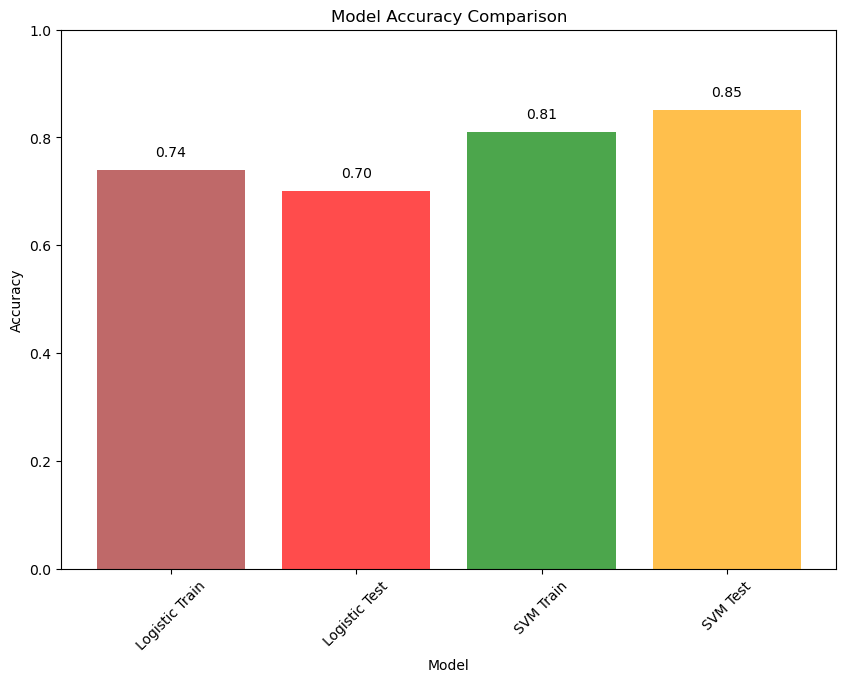

In [103]:
#NOw we compare both models
# Define accuracy scores for each model (placeholders)
accuracy_log_train = 0.74
accuracy_log_test = 0.70
accuracy_svm_train = 0.81
accuracy_svm_test = 0.85

# Define model names
models = [
    'Logistic Train',
    'Logistic Test',
    'SVM Train',
    'SVM Test'
]

# Define accuracy scores for each model
accuracies = [
    accuracy_log_train,
    accuracy_log_test,
    accuracy_svm_train,
    accuracy_svm_test
]

# Print accuracy values for each model
for i in range(len(models)):
    print(f"{models[i]}: {accuracies[i]}")

# Define colors for each model
colors = ['brown', 'red', 'green', 'orange']

# Plot the bar chart
plt.figure(figsize=(10, 7))
plt.bar(models, accuracies, color=colors, alpha=0.7)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0, 1])

# Display the accuracy values on top of each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', va='bottom')

plt.xticks(ticks=range(len(models)), labels=models, rotation=45)
plt.show()

In [104]:
#In light of the comparison between the Support Vector Machine (SVM) and logistic regression models:

#With training data, logistic regression produced an accuracy of 74%, while with test data, it reached 70%.
#SVM outperformed other algorithms in terms of accuracy, scoring 81% on training data and 85% on test data.
#These findings show that on both the training and test datasets, the SVM model performed more accurately than the logistic regression model. The improved performance of the SVM model was probably influenced by its capacity to handle high-dimensional spaces and identify complex decision boundaries in the data. It's crucial to remember that the logistic regression model nevertheless received respectable accuracy ratings, especially in light of its ease of use and readability in comparison to SVM.

#In summary, SVM outperformed logistic regression in this comparison despite both being efficient classification techniques. When selecting one of these models, one should take into account the data's complexity, the need for interpretability, and the available computing power.

